# Recommending books challenge

In [1]:
#pip install pandas

In [2]:
#pip install matplotlib

In [3]:
#pip install torch

In [1]:
# import dependencies
import dgl
import torch

# visualize the graph
import networkx as nx
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'dataset.csv')

In [3]:
df = df.sort_values(by = ['user_id','date_created'])
df

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0
...,...,...,...,...,...,...,...,...,...
4990,-2019295583,10,"""2019-12-07 16:09:21""",chapter-1,roestenburg,344,65,486,0
4991,-2019295583,102,"""2019-12-07 16:14:21""",chapter-1,roestenburg,344,65,486,0
4992,-2019295583,107,"""2019-12-07 17:51:22""",chapter-1,roestenburg,344,65,486,0
4993,-2019295583,98,"""2019-12-07 20:54:58""",chapter-1,roestenburg,344,65,486,0


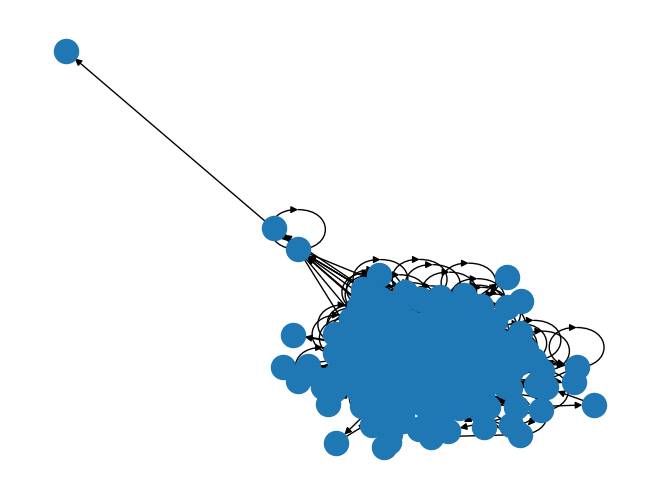

In [70]:
# specifying the source
df['source'] = df['book']
# specifying the target
df['target'] = df['source'].shift(-1)
df['user_check'] = df['user_id'].shift(-1)
df['keep_drop'] = np.where((df['user_check'] == df['user_id']),df['user_id'], np.nan)
# creating a subset
#df = df.dropna(subset=['keep_drop'])
G = nx.from_pandas_edgelist(df, 'source','target', create_using = nx.DiGraph)
nx.draw(G)

In [71]:
def print_graph_info(graph):
    print("Directed graph:", graph.is_directed())
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
print_graph_info(G)
print_graph_info(G)

Directed graph: True
Number of nodes: 273
Number of edges: 1147
Directed graph: True
Number of nodes: 273
Number of edges: 1147


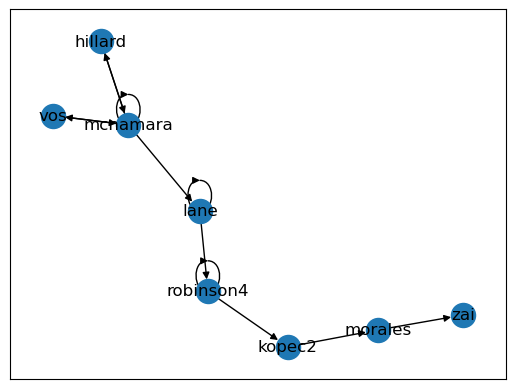

In [73]:
# Selecting the first 50 rows of the DataFrame
dfrows = df.iloc[:50]

# This code creates a directed graph object "G" from the DataFrame "df"
Gi=nx.from_pandas_edgelist(dfrows,'source','target',create_using=nx.DiGraph)

# Draw the graph "G" with labeled nodes
pos = nx.spring_layout(Gi)
nx.draw_networkx_nodes(Gi, pos)
nx.draw_networkx_edges(Gi, pos)
nx.draw_networkx_labels(Gi, pos, labels={node: node for node in Gi.nodes()})
plt.show()

In [74]:
def print_graph_info(graph):
    print("Directed graph:", graph.is_directed())
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
print_graph_info(Gi)
print_graph_info(Gi)

Directed graph: True
Number of nodes: 8
Number of edges: 12
Directed graph: True
Number of nodes: 8
Number of edges: 12


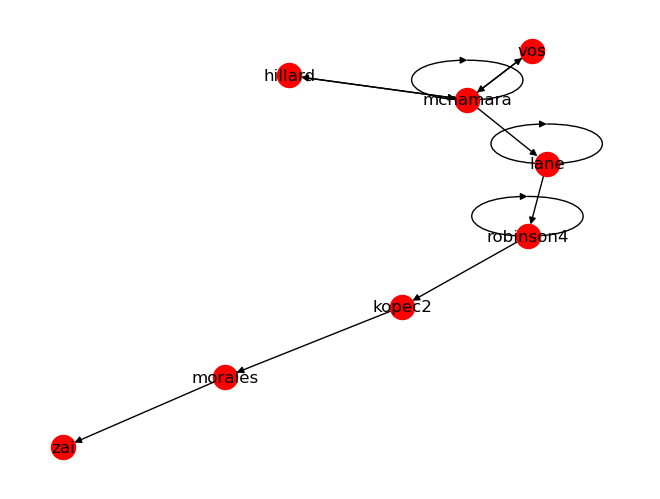

In [75]:
nx.draw(Gi, with_labels=True, node_color='r')

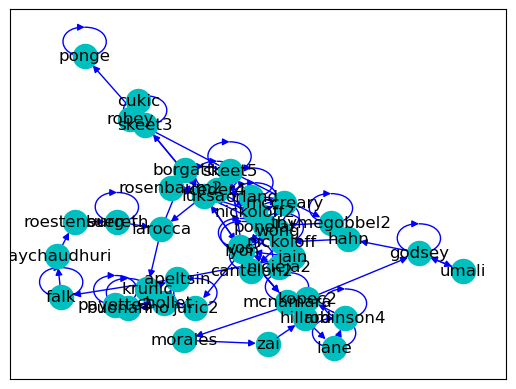

In [76]:
# Selecting the last 50 rows of the DataFrame
dfrows = df.iloc[:200]

# This code creates a directed graph object "G" from the DataFrame "df"
Go=nx.from_pandas_edgelist(dfrows,'source','target',create_using=nx.DiGraph)

# Draw the graph "G" with labeled nodes
pos = nx.spring_layout(Go)
nx.draw_networkx_nodes(Go, pos, node_color = 'c')
nx.draw_networkx_edges(Go, pos, edge_color = 'b')
nx.draw_networkx_labels(Go, pos, labels={node: node for node in Go.nodes()})
plt.show()

## centrality measures

In [77]:
out = nx.out_degree_centrality(G)
nx.set_node_attributes(G, out, "out-degree")
bb=nx.betweenness_centrality(G)
nx.set_node_attributes(G, bb, "betweenness")
#Create the egen centrality
eigen=nx.eigenvector_centrality(G)
nx.set_node_attributes(G,eigen, "eigen")
# Create a list of Available books and attributes
data_list = list(G.nodes(data=True))
# Convert centrality measure into a dataFrame
data={} # create data dictionary
data["book"]=[x[0] for x in data_list]
data['out-degree'] = [x[1]['out-degree'] for x in data_list]
data["eigen"] = [x[1]['eigen'] for x in data_list]
data['betweenness'] = [x[1]['betweenness'] for x in data_list]
df1=pd.DataFrame(data)
row1 = [n for n in G['abraham']]
df2 = pd.DataFrame(row1)
df3 = df2.set_index(0).join(df1.set_index('book'))
df3 = df3.sort_values(by=["eigen"],ascending=False)

In [78]:
import ipywidgets as widgets
from ipywidgets import interact, Select

In [4]:
#pip install voila

In [5]:
#pip install --upgrade --user pyqt5

In [8]:
conda update --all

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\arnol\anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-2023.03           |           py39_0          74 KB
    anaconda-client-1.11.1     |   py39haa95532_0         154 KB
    anaconda-navigator-2.4.0   |   py39haa95532_0         5.5 MB
    arrow-1.2.3                |   py39haa95532_1         158 KB
    astroid-2.14.2             |   py39haa95532_0         394 KB
    asttokens-2.0.5            |     pyhd3eb1b0_0          20 KB
    attrs-22.1.0               |   py39haa95532_0          84 KB
    babel-2.11.0               |   py39haa95532_0         6.8 MB
    blosc-1.21.3               |       h6c2663c_0          86 KB
    ca-certificates-2023.01.10 |       haa95532_0         121 KB
    certifi-2022.12.7      



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda






ninja-base-1.10.2    | 255 KB    |            |   0% 
ninja-base-1.10.2    | 255 KB    | ###1       |  31% 
ninja-base-1.10.2    | 255 KB    | ########## | 100% 
ninja-base-1.10.2    | 255 KB    | ########## | 100% 

kiwisolver-1.4.4     | 60 KB     |            |   0% 
kiwisolver-1.4.4     | 60 KB     | ########## | 100% 
kiwisolver-1.4.4     | 60 KB     | ########## | 100% 

libvorbis-1.3.7      | 202 KB    |            |   0% 
libvorbis-1.3.7      | 202 KB    | #######9   |  79% 
libvorbis-1.3.7      | 202 KB    | ########## | 100% 

executing-0.8.3      | 18 KB     |            |   0% 
executing-0.8.3      | 18 KB     | ########## | 100% 
executing-0.8.3      | 18 KB     | ########## | 100% 

cffi-1.15.1          | 238 KB    |            |   0% 
cffi-1.15.1          | 238 KB    | ######     |  61% 
cffi-1.15.1          | 238 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... 

    Win

In [6]:
#pip install --upgrade --user pyqtwebengine

In [7]:
#!jupyter nbextension enable --py widgetsnbextension

In [8]:
#pip install IPython 

In [9]:
#pip install ipywidgets

In [79]:
from IPython.display import display

In [80]:
book = sorted(df.book.unique().tolist())

# func tht returns row of book
def view(book=''):
    row1 = [n for n in G[book]]
    df2 = pd.DataFrame(row1)
    df3 = df2.set_index(0).join(df1.set_index('book')) # iteration starts at 0 ...
    df3 = df3.sort_values(by=['eigen'], ascending = False)
    return df3

In [81]:
# def w to carry the book the user chooses
w = Select(options = book)

In [82]:
v = interact(view, book = w)
display(v)

interactive(children=(Select(description='book', options=('abernethy2', 'abraham', 'adzic', 'alag', 'allaire',…

<function __main__.view(book='')>